(quickstart)=


# Quick Start

In [9]:
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 12
rcParams["legend.frameon"] = False
rcParams["lines.markersize"] = 10

import warnings
warnings.filterwarnings('ignore')

As a quick example, we show how to use riccati module to solve the Airy equation,

$$ u''(t) + tu(t) = 0, $$

on the interval $t \in [1, 50]$, subject to the initial conditions $u(1) = 1$, $u'(1) = 0$. The equation takes the required form,

$$ u''(t) + 2\gamma(t)u'(t) + \omega^2(t)u(t) = 0, $$

with $\gamma(t) = 0$ and $\omega(t) = \sqrt{t}$.

First we import the necessary modules:

In [10]:
import numpy as np
import riccati

Then we need to define the problem by specifying the ODE coefficients, $\omega(t)$ and $\gamma(t)$ as callables, making sure that the result vectorises correctly:

In [11]:
w = lambda t: np.sqrt(t)
g = lambda t: np.zeros_like(t) # Make sure the result is vectorised!

We then define the ODE with `solversetup`. This is so that the same ODE can be solved repeatedly with different initial conditions or tolerance parameters, without overhead:

In [12]:
# Set up the solver
info = riccati.solversetup(w, g)

To fully nail down the solution, we need to define the integration range and initial conditions, which are the only strictly necessary parameters for the solver to run:

In [13]:
# Integration range
ti = 1e0
tf = 5e1
# Initial conditions
ui = 1.0
dui = 0.0

We'll now give some optional parameters: we set the (local) relative tolerance, `eps`, and we ask the solver to produce output at intermediate points (as opposed to points the solver would naturally step to; called dense output) for visualisation:

In [14]:
# Relative tolerance (optional)
eps = 1e-12
# Dense output (optional)
t_eval = np.linspace(ti, tf, 800)

We are now ready to solve! Some of the outputs are not important for this example, so we store them together in `misc`.

In [15]:
ts, ys, *misc, y_eval, dy_eval = riccati.solve(info, ti, tf, ui, dui, eps = eps, xeval = t_eval)

Finally, we plot the output:

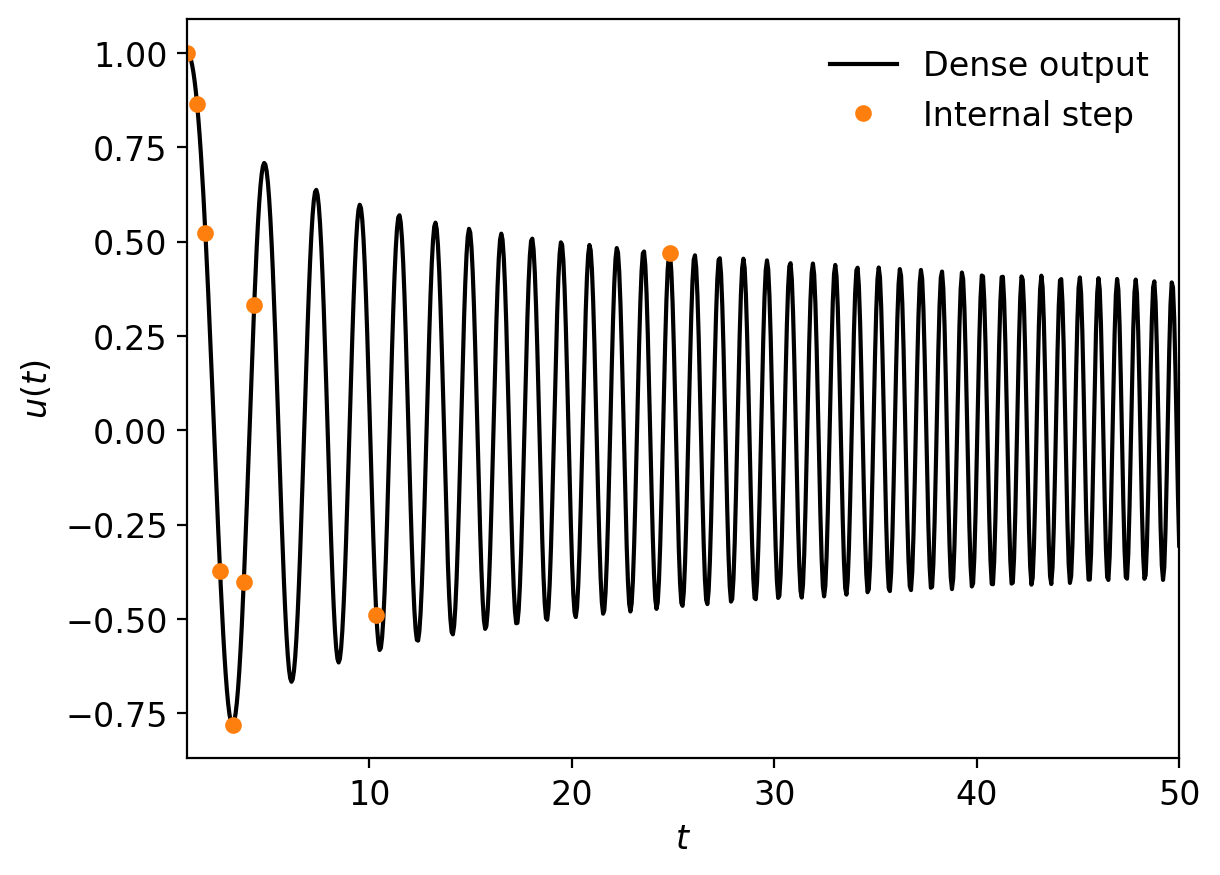

In [16]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(t_eval, y_eval, label = "Dense output", color = 'k')
plt.plot(ts, ys, '.', label = "Internal step", color = 'C1')
plt.xlim(ti, tf)
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.legend()
plt.show()